# Exploration Exercises: 

## What's driving the target variable?

- explore on Train, and only Train

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import itertools
import env
import wrangle
import split


In [2]:
df = wrangle.wrangle_zillow()
df.shape

(2134889, 8)
(2096764, 8)


(2096764, 8)

In [3]:
# split
train, validate, test = split.train_validate_test_split(df, 'taxvaluedollarcnt')
train.shape, validate.shape, test.shape


((1174187, 8), (503224, 8), (419353, 8))

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

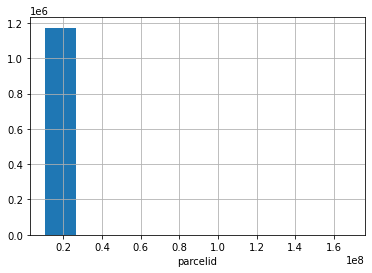

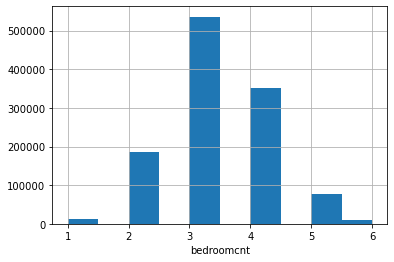

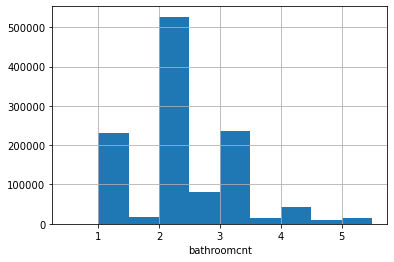

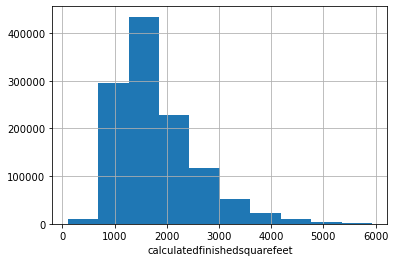

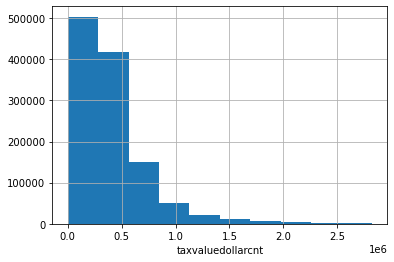

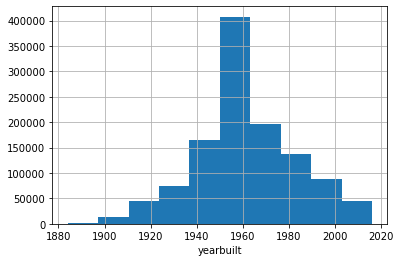

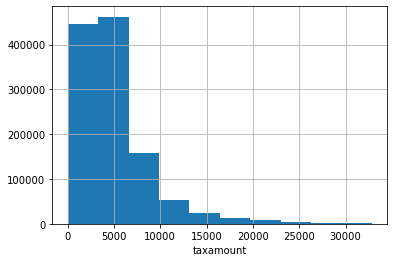

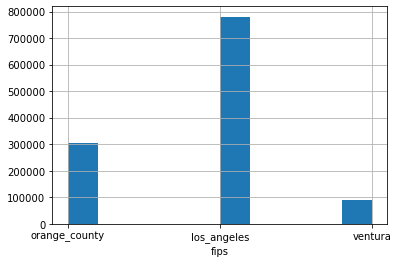

In [4]:
# univariate
def univariate_dist(df):
    for col in train.columns:
        train[col].hist()
        plt.xlabel(col)
        plt.show()
univariate_dist(train)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096764 entries, 4 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      object 
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          object 
dtypes: float64(6), object(2)
memory usage: 144.0+ MB


In [6]:
non_quants = train[['fips']]
quants = train.drop(columns=['fips','parcelid']).columns

In [10]:
# we want to run pairs of the available variables, and output the appropriate type of chart for the variable types

def plot_variable_pairs(train):
    for pair in list(itertools.combinations(train.columns, 2)):
        if pair[0] in quants:
            if pair[1] in quants:
                sns.lmplot(x=pair[0], y=pair[1], data=train.sample(100_000), hue='fips')
            elif pair[1] in non_quants:
                sns.violinplot(x=pair[1], y=pair[0], data=train.sample(100_000))
        
        elif pair[0] in non_quants:
            if pair[1] in non_quants:
                ctab = pd.crosstab(pair[0], pair[1])
                sns.heatmap(ctab, annot=True)
            elif pair[1] in quants:
                sns.violinplot(x=pair[0], y=pair[1], data=train.sample(100_000))
            

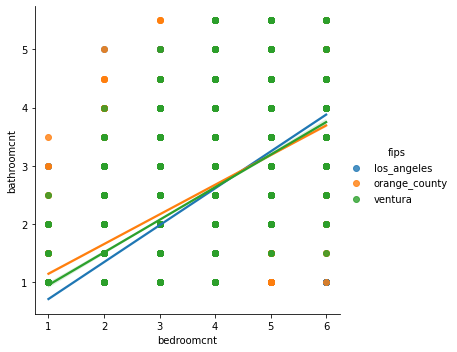

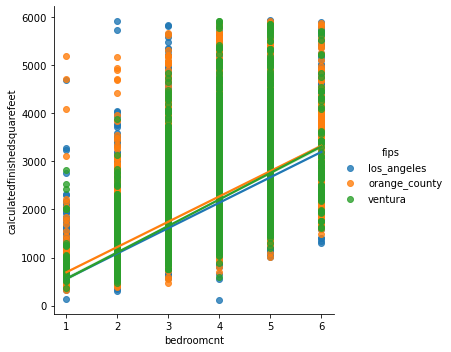

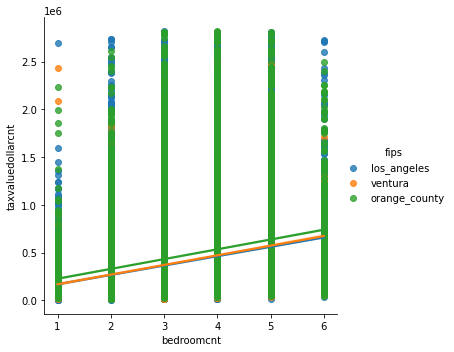

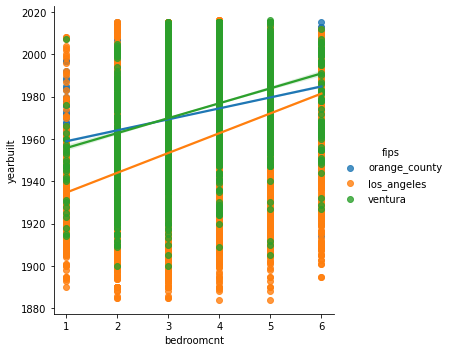

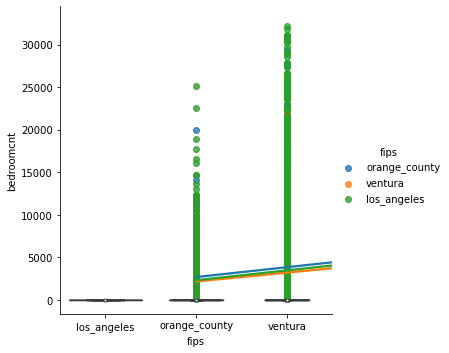

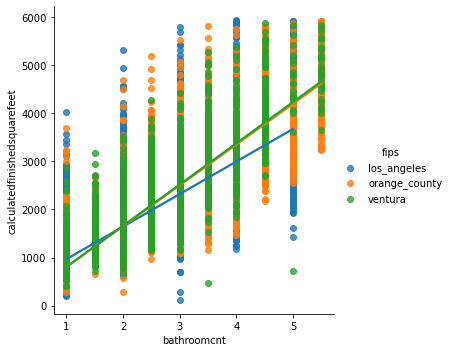

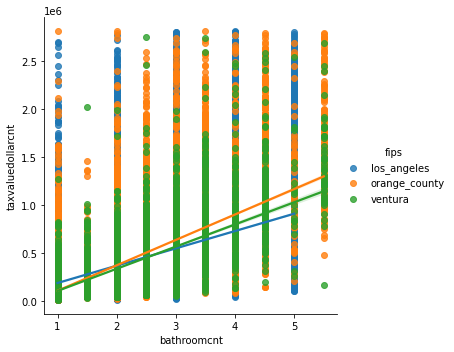

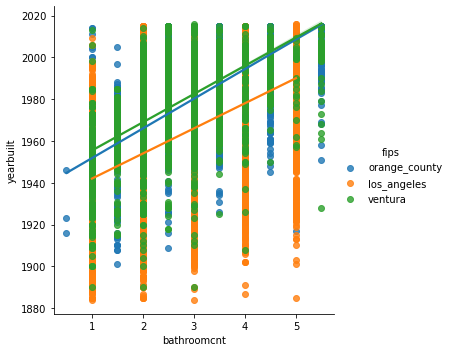

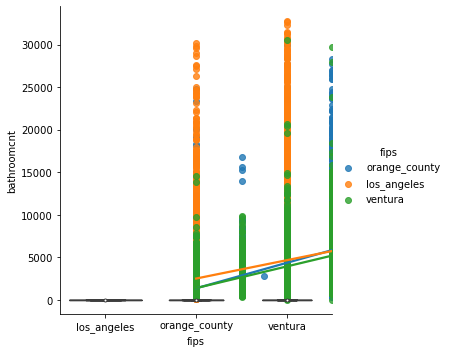

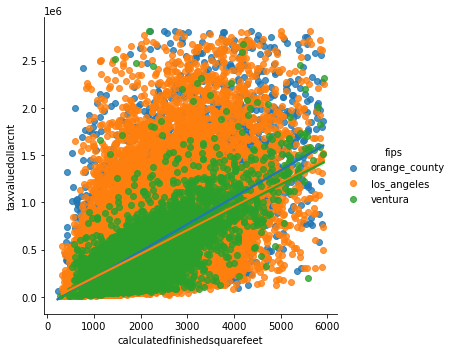

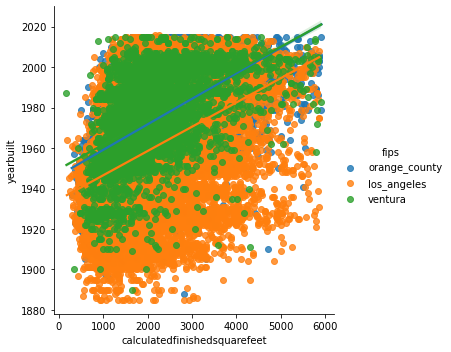

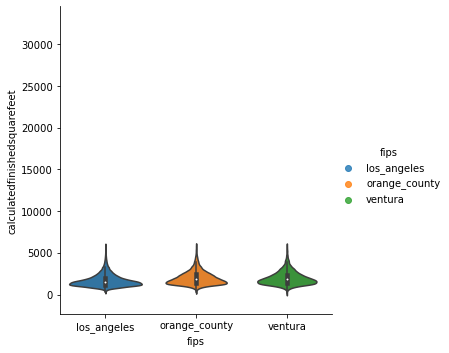

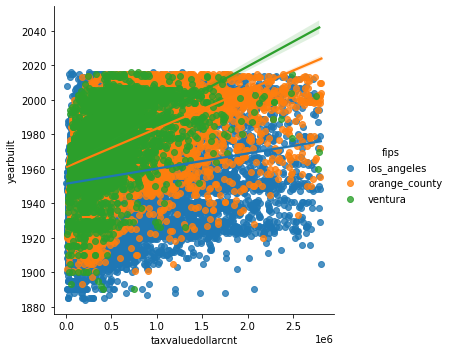

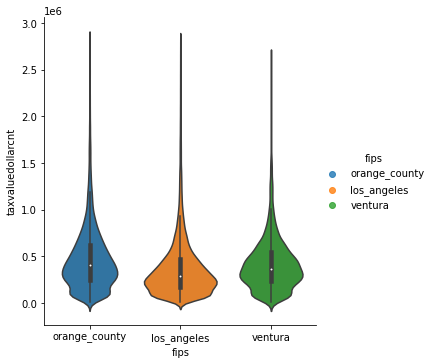

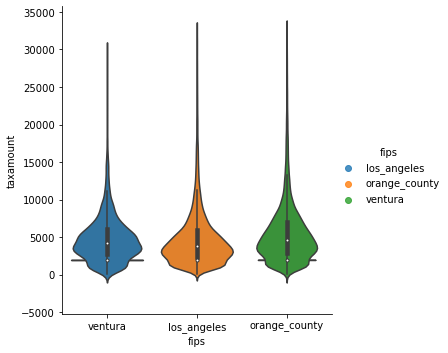

In [11]:
plot_variable_pairs(train)

In [9]:
#def plot_categorical_and_continuous_vars(train):
    